# <span style='color:Red'> Evolving Phase  </span>

## (Removal of salt from Eastern Mediterranean (eMed) after the flooding event)

## Diffusing a deep, anoxic layer of brine

Assume that:
* We have a semi-enclosed basin of depth $H$.
* The initial salinity profile, $S_i$, consists of an upper layer of less-saline water, with a deep layer of brine.
* The surface layer is effectively pinned to average equal eMed sea surface salinity (~38.8 g/kg), while the lower boundary condition on salinity is no-flux.
* Mixing and advection is very rapid in the $x$ and $y$ directions (horizontally), so that to a good approximation we can write the salinity at any time, $S$ to be a function of $z$ only.
* We can divide the domain up into $N$ equally spaced layers, each $d_z$ thick, and that we can characterise the basin hypsometry through the surface area, $A(z)$.

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

## Upload data files here

In [32]:
A = np.loadtxt(fname="Hypsometry40m.txt")  # Basin hypsometry, every 40 m interval
Si = np.loadtxt(fname="Salinity_prof_EPhase.txt")  # Initial salinity profile

## Setting parameters

Text(0.5, 0, 'Salinity (g/kg)')

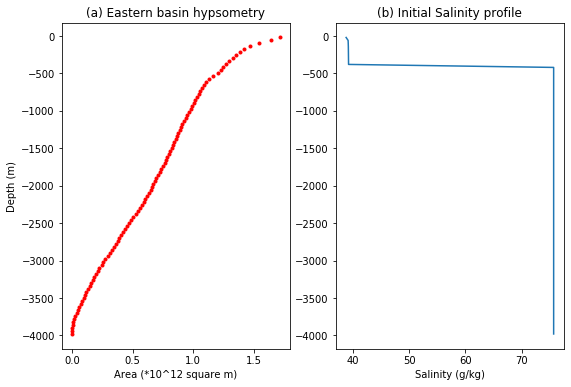

In [33]:
N  = 100     # Number of layers
H  = 4000    # Total depth set to 4000 m
dz = H/N    # Layer thickness

z  = - np.linspace(0.5*dz, H-dz/2, N)  # Creates an array of mid-layer depth

Ks       = 2e-5           # Diffusivity coefficient [m^2/s]
Years    = 50000          # How long to run for [years]
timestep = 5              # timestep [days]
dt       = 86400*timestep # timestep [seconds]
## Derived parameters
nt = (Years*365)/timestep

Si[0]   = 38.8            # Setting surface salinity to present eMed surface salinity

S_brine = Si[-1]          # Deep brine salinity [PSU]

# Arrays for plotting
x = []
y = []

fig, ax = plt.subplots(1,2,figsize=(9,6))
ax[0].plot(A,z,'r.')
ax[0].set_title('(a) Eastern basin hypsometry')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Area (*10^12 square m)')

ax[1].plot(Si,z)
ax[1].set_title('(b) Initial Salinity profile')
ax[1].set_xlabel('Salinity (g/kg)')


## Solving for vertical diffusion

Assume that the only means of transferring salt vertically is through a turbulent diffusion, with a known, constant coefficient of diffusion, $K_s$. 
Then, the flux between adjacent layers is proportional to the local salinity gradient,
$$F \sim K_s \frac{\partial S}{\partial z}$$
The evolution of salinity in the $j$-th layer of our domain is given by the flux divergence, or in discretised form
$$A^j \frac{\partial S^j}{\partial t} = \frac{K_s}{d_z} \left(A^{j+1}\frac{S^{j+1} - S^j}{d_z} - A^{j}\frac{S^{j} - S^{j-1}}{d_z}\right)$$
where the superscript refers to the location in the vertical grid. 
This equation can be rewritten as
$$\frac{\partial S^j}{\partial t} = \frac{K_s}{d_z^2} \left(\frac{A^{j+1}}{A^j}(S^{j+1} - S^j) - (S^{j} - S^{j-1})\right)$$
We further discretise this in time (with time levels indicated by the subscript $\tau$) to give
$$\frac{S^j_{\tau+1} - S^j_{\tau-1}}{2d_t} = \frac{K_s}{d_z^2} \left(S^{j-1}_\tau - \left(\frac{A^{j+1}}{A^j}+1\right)S^j_\tau + \frac{A^{j+1}}{A^j}S^{j+1}_\tau \right)$$
where $d_t$ is the timestep (note the use of a 2nd order leapfrog timestep scheme). 
Finally, rewrite this as
$$ S^j_{\tau+1} = S^j_{\tau-1} + \frac{2 K_s d_t}{d_z^2} \left(S^{j-1}_\tau - \left(\frac{A^{j+1}}{A^j}+1\right)S^j_\tau + \frac{A^{j+1}}{A^j}S^{j+1}_\tau \right)$$
Note that the surface boundary condition is a constant salinity, i.e. 
$$S^0_{\tau+1} = S^0_{\tau-1}$$
while at the bottom, the no-flux condition means that
$$S^{N-1}_{\tau+1} = S^{N-1}_{\tau-1} + \frac{2 K_s d_t}{d_z^2} \left(S^{N-2}_\tau - S^{N-1}_\tau \right)$$
To compute solutions to this problem, it is most convenient to define the vector $\mathbf{S}$ with elements $S^j$ to give
$$ \mathbf{S}_{\tau+1} = \mathbf{S}_{\tau-1} + \frac{2 K_s d_t}{d_z^2} \mathsf{B} \mathbf{S}_\tau $$
where the matrix $\mathsf{B}$ is given by
$$\mathsf{B} = \left[ \begin{eqnarray} 0 & 0 & 0 & 0 &\cdot & &  \\
1 & -(\tfrac{A^3}{A^2}+1)&  \tfrac{A^3}{A^2} & 0 & \cdot & &\\
&\cdot  & \cdot  & \cdot &  & \\
&0  & 1 & -(\tfrac{A^{j+1}}{A^1}+1)&  \tfrac{A^{j+1}}{A^j} & 0 & \cdot & &\\
& & &\cdot  & \cdot  & \cdot &  & \\
& & & 0   & 0  & 0 & 1 & -1 \\
\end{eqnarray} \right]$$

Salinity1_000000.txt
Salinity1_073000.txt
Salinity1_146000.txt
Salinity1_219000.txt
Salinity1_292000.txt
Salinity1_365000.txt
Salinity1_438000.txt
Salinity1_511000.txt
Salinity1_584000.txt
Salinity1_657000.txt
Salinity1_730000.txt
Salinity1_803000.txt
Salinity1_876000.txt
Salinity1_949000.txt
Salinity1_1022000.txt
Salinity1_1095000.txt
Salinity1_1168000.txt
Salinity1_1241000.txt
Salinity1_1314000.txt
Salinity1_1387000.txt
Salinity1_1460000.txt
Salinity1_1533000.txt
Salinity1_1606000.txt
Salinity1_1679000.txt
Salinity1_1752000.txt
Salinity1_1825000.txt
Salinity1_1898000.txt
Salinity1_1971000.txt
Salinity1_2044000.txt
Salinity1_2117000.txt
Salinity1_2190000.txt
Salinity1_2263000.txt
Salinity1_2336000.txt
Salinity1_2409000.txt
Salinity1_2482000.txt
Salinity1_2555000.txt
Salinity1_2628000.txt
Salinity1_2701000.txt
Salinity1_2774000.txt
Salinity1_2847000.txt
Salinity1_2920000.txt
Salinity1_2993000.txt
Salinity1_3066000.txt
Salinity1_3139000.txt
Salinity1_3212000.txt
Salinity1_3285000.txt
Sa

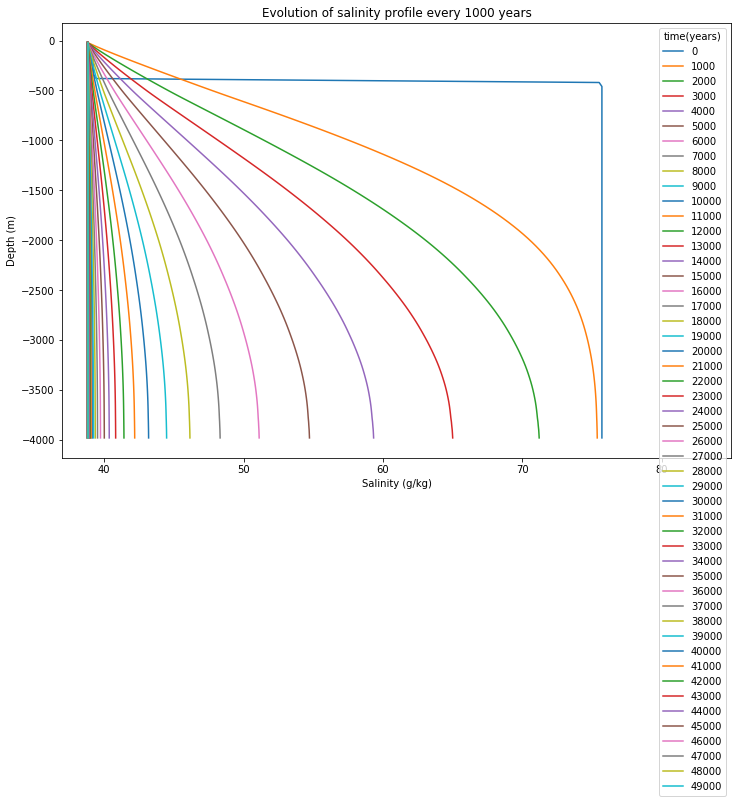

In [34]:

# Define the B matrix
B = np.zeros((N,N))
for ii in range(1,N-1):
    B[ii,ii] = -(1+A[ii+1]/A[ii])
    B[ii,ii-1] = 1
    B[ii,ii+1] = A[ii+1]/A[ii]
    
B[N-1,N-1]=-1
B[N-1,N-2]=1

#print (B)
#print (A)

# Timestepping loop
S = Si.copy()
Sp = Si.copy()
plt.figure(figsize=(12,8))
Time = np.array([0])
Sbot = np.array([S_brine])
for i in np.arange(nt):
    Sn = Sp + 2*dt*Ks/dz**2*np.matmul(B,S)
    Sp = S.copy()
    S = Sn.copy()
    #print (Sn)
    if (np.mod(i,100)==0): ## This is a fudge to stabilise for leapfrog instability
        S = 0.5*(S+Sp)
        Sp = S.copy()
    if (np.mod(i*dt,86400*365*1000)==0): ## Plot the S profile every 1000 years
        plt.plot(S,z,label='%d'%(i*dt/(86400*365)))
        filename = "Salinity1_%06d.txt" % i
        print (filename)  # Use this to save salinity profiles every 1000 years
        #np.savetxt(filename,S,fmt="%s")
    if (np.mod(i*dt,86400*365*100)==0): ## Take a bottom S sample every 100 years
        Sbot = np.append(Sbot, S[-1])
        Time = np.append(Time, (i*dt/(86400*365)))
        
        x.append(S[-1])    # appends salinity
        y.append(Time[-1]) # appends time

#np.savetxt("salinityEvo5.txt", np.array(x), fmt="%s")
#np.savetxt("time2.txt", np.array(y), fmt="%s")

plt.title('Evolution of salinity profile every 1000 years')
plt.ylabel('Depth (m)')
plt.xlabel('Salinity (g/kg)')
plt.xlim(xmax=85)
legend = plt.legend(title = "time(years)")


## Interpretation

The above plot shows the salinity profile every 1000 years for the parameters used. 

Anoxic conditions would be broken down when the salinity at depth came within the range of the densest waters found at the surface. If this was ~39 g/kg, then we are looking at >20,000 years of anoxia, as shown by the yellow line in the time series below ...

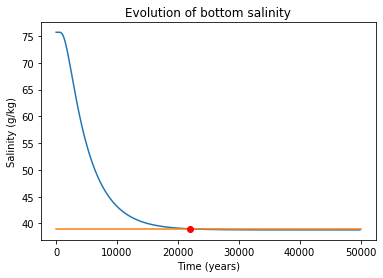

In [36]:
plt.plot(Time, Sbot)
plt.plot([0,50000],[39,39])
plt.title('Evolution of bottom salinity')
plt.ylabel('Salinity (g/kg)')
plt.xlabel('Time (years)')

curve_1 = LineString(np.column_stack((Time, Sbot)))
curve_2 = LineString(np.column_stack(([0,50000],[39,39])))
intersection = curve_1.intersection(curve_2)

plt.plot(*intersection.xy, 'ro')